In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

print("All good!")


All good!


In [2]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

print("Notebook CWD:", Path.cwd())

# connect to the ONLY correct DB
con = duckdb.connect("../sql/saas.db")

print(con.execute("SHOW TABLES").fetchall())


Notebook CWD: c:\Users\sanvi\OneDrive\Desktop\saas-funnel-analytics\ml
[('events',), ('payments',), ('subscriptions',), ('users',)]


In [3]:
df_funnel = con.execute(
    open("../sql/funnel.sql").read()
).fetchdf()

df_funnel


,total_users,activated_users,paid_users,activation_rate,paid_conversion_rate,post_activation_conversion_rate
0,10000,9300,967,93.0,9.67,10.4


In [4]:
df_ret = con.execute(
    open("../sql/retention.sql").read()
).fetchdf()

df_ret.head()


,cohort_date,week_number,retention_percentage
0,2024-01-01,0.0,89.47
1,2024-01-01,1.0,90.77
2,2024-01-01,2.0,62.75
3,2024-01-01,3.0,58.40
4,2024-01-01,4.0,56.57


In [5]:
df_churn = con.execute(
    open("../sql/churn.sql").read()
).fetchdf()

df_churn


,total_users,churned_users,churn_rate
0,10000,10000.0,100.0


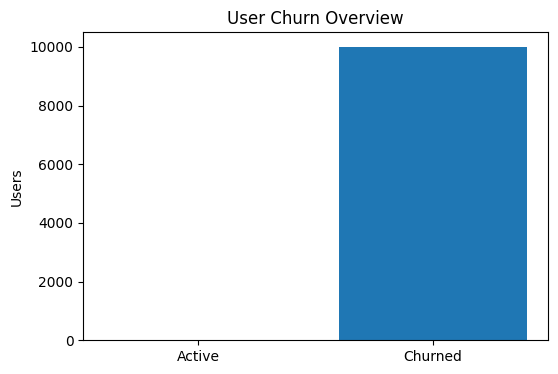

In [6]:
plt.figure(figsize=(6,4))
plt.bar(
    ["Active", "Churned"],
    [
        df_churn["total_users"][0] - df_churn["churned_users"][0],
        df_churn["churned_users"][0]
    ]
)

plt.title("User Churn Overview")
plt.ylabel("Users")
plt.show()


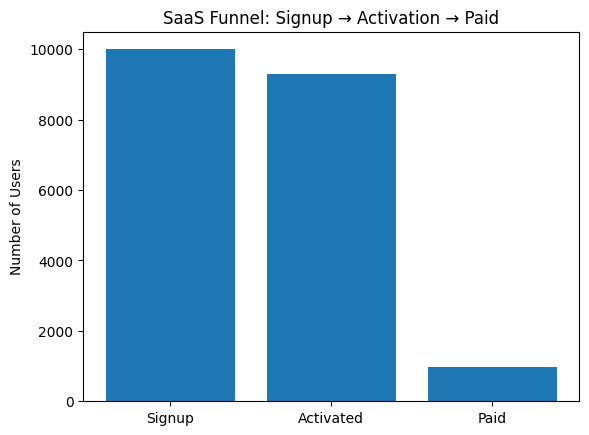

In [7]:
labels = ["Signup", "Activated", "Paid"]
values = [
    df_funnel["total_users"][0],
    df_funnel["activated_users"][0],
    df_funnel["paid_users"][0]
]

plt.figure()
plt.bar(labels, values)
plt.title("SaaS Funnel: Signup → Activation → Paid")
plt.ylabel("Number of Users")
plt.show()


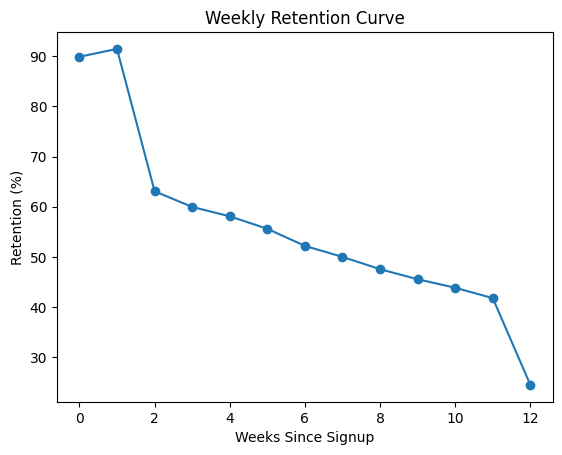

In [8]:
df_ret = con.execute(open("../sql/retention.sql").read()).fetchdf()

avg_ret = df_ret.groupby("week_number")["retention_percentage"].mean()

plt.figure()
plt.plot(avg_ret.index, avg_ret.values, marker="o")
plt.title("Weekly Retention Curve")
plt.xlabel("Weeks Since Signup")
plt.ylabel("Retention (%)")
plt.show()
